In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import datetime

In [2]:
%run ../code/PatternSearch

In [3]:
#  weather data 
weather_data=pd.read_csv("../Data/history_export_2019-02-24T10_52_08.csv",index_col=False,sep=";")

In [4]:
weather_data.head()

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Mean Sea Level Pressure [MSL],Total Precipitation (high resolution) [sfc],Total Cloud Cover [sfc],High Cloud Cover [high cld lay],Medium Cloud Cover [mid cld lay],Low Cloud Cover [low cld lay],Sunshine Duration [sfc],Shortwave Radiation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
0,2010,3,1,0,0,5.83,71.0,1009.3,0.0,0.0,0.0,0.0,0.0,-999.0,0.0,9.04,259.81
1,2010,3,1,1,0,5.57,72.0,1009.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.44,256.29
2,2010,3,1,2,0,5.43,72.0,1010.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.15,255.79
3,2010,3,1,3,0,5.04,74.0,1011.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.98,254.74
4,2010,3,1,4,0,4.72,77.0,1011.3,0.0,3.0,0.0,0.0,3.0,0.0,0.0,7.40,256.72


In [5]:
# simple cleaning of data
# make date any index
weather_data["Date"]=weather_data.apply(lambda x: datetime.datetime(int(x["Year"]),int(x["Month"]),int(x["Day"]),int(x["Hour"])),axis=1)
weather_data.set_index(pd.DatetimeIndex(weather_data['Date']),inplace=True)
# select only "Temperature","Humidity","Pressure"
weather_data=weather_data[weather_data.columns[[5,6,7]]]
weather_data.columns=["Temperature","Humidity","Pressure"]

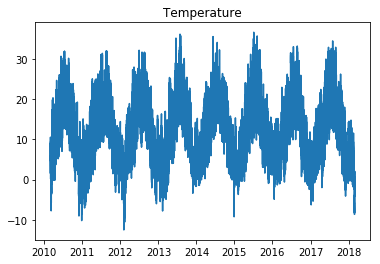

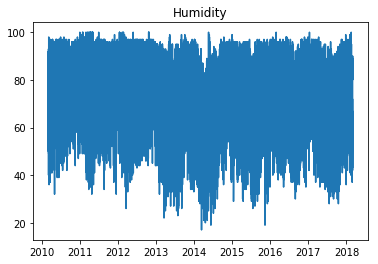

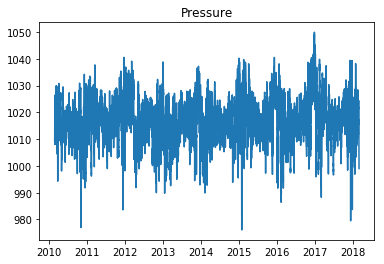

In [6]:
for i in weather_data.columns:
    plt.plot(weather_data[i],label=i)
    plt.title(i)
    plt.show()

In [7]:
# first 4 days as a pattern 96h
pattern=weather_data[0:96]

In [8]:
# pattern search
# found search from 90 102 h 
# using 15 fourier coefficients
ps_based=PatternSearch(pattern[["Temperature"]],weather_data[["Temperature"]],n_min=90,n_max=102,n=15)

score=0.0
found pattern is from 2010-03-01 00:00:00 to 2010-03-04 23:00:00
It is 0 steps different from pattern


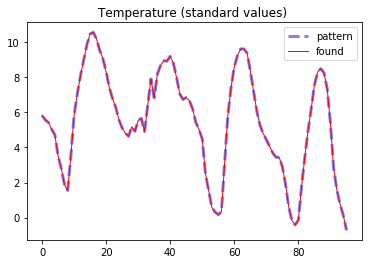

score=0.3597324994601333
found pattern is from 2011-02-14 23:00:00 to 2011-02-19 01:00:00
It is 3 steps different from pattern


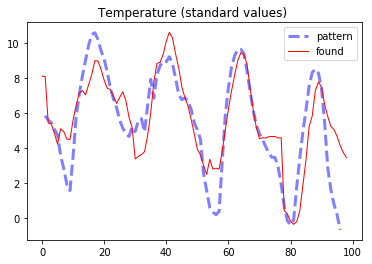

score=0.38640903760325107
found pattern is from 2016-12-13 01:00:00 to 2016-12-16 23:00:00
It is -1 steps different from pattern


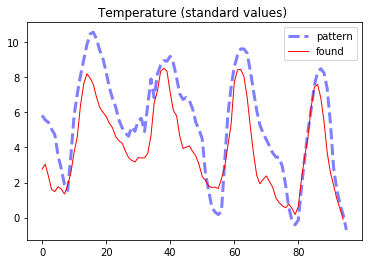

score=0.38992531054184953
found pattern is from 2011-11-22 00:00:00 to 2011-11-26 00:00:00
It is 1 steps different from pattern


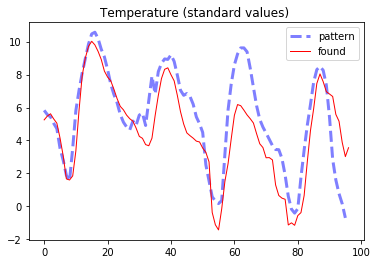

score=0.3900609415356061
found pattern is from 2014-01-18 23:00:00 to 2014-01-23 00:00:00
It is 2 steps different from pattern


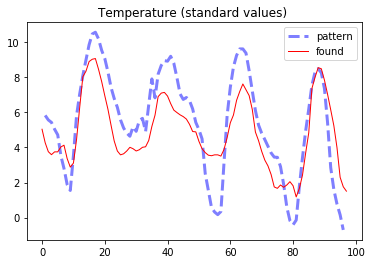

In [9]:
# take  top 5 matches and plot
results_based=ps_based.FindPatterns(5,True)

In [10]:
ps_more_coef=PatternSearch(pattern[["Temperature"]],weather_data[["Temperature"]],n_min=90,n_max=102,n=25)

score=0.0
found pattern is from 2010-03-01 00:00:00 to 2010-03-04 23:00:00
It is 0 steps different from pattern


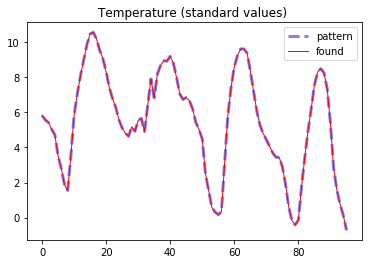

score=0.3691013089921978
found pattern is from 2011-02-14 23:00:00 to 2011-02-19 01:00:00
It is 3 steps different from pattern


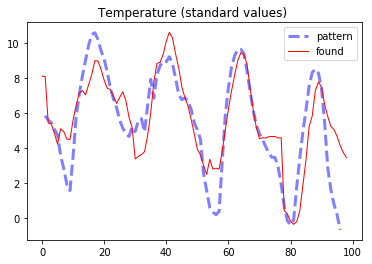

score=0.39304977028049115
found pattern is from 2016-12-13 01:00:00 to 2016-12-16 23:00:00
It is -1 steps different from pattern


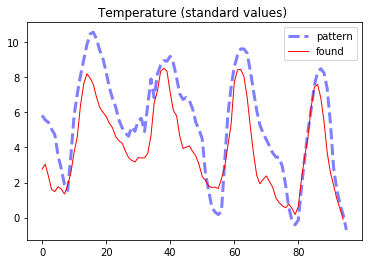

score=0.3989174035817953
found pattern is from 2014-01-18 23:00:00 to 2014-01-23 00:00:00
It is 2 steps different from pattern


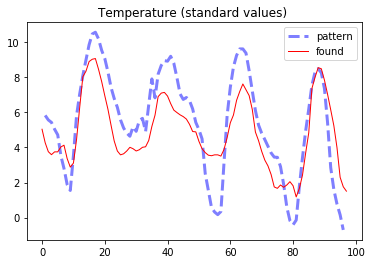

score=0.39927560700816334
found pattern is from 2011-11-22 00:00:00 to 2011-11-26 00:00:00
It is 1 steps different from pattern


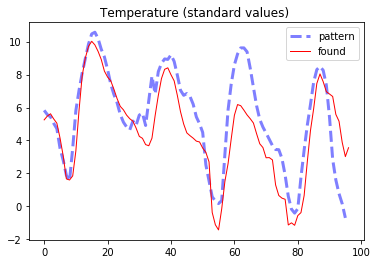

In [11]:
results_more_coef=ps_more_coef.FindPatterns(5,True)

score=0.0
found pattern is from 2010-03-01 00:00:00 to 2010-03-04 23:00:00
It is 0 steps different from pattern


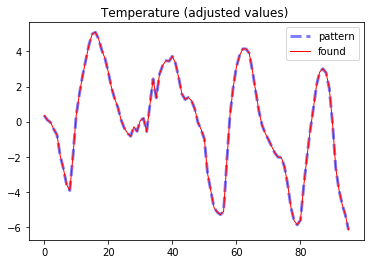

score=0.24684972279234935
found pattern is from 2010-09-14 22:00:00 to 2010-09-19 00:00:00
It is 3 steps different from pattern


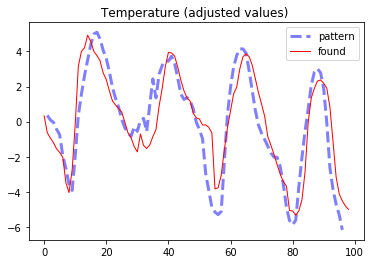

score=0.26915316457163707
found pattern is from 2015-12-24 00:00:00 to 2015-12-28 01:00:00
It is 2 steps different from pattern


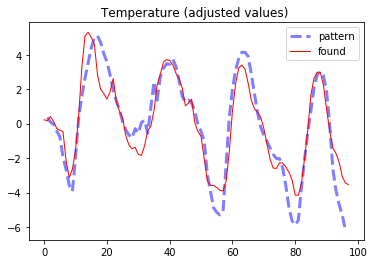

score=0.2769650805530734
found pattern is from 2011-01-27 01:00:00 to 2011-01-30 23:00:00
It is -1 steps different from pattern


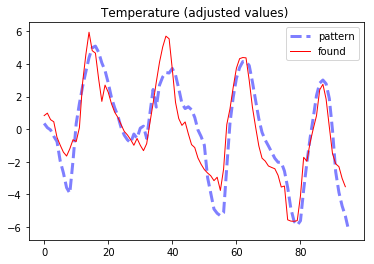

score=0.28188060285099065
found pattern is from 2016-12-13 01:00:00 to 2016-12-16 23:00:00
It is -1 steps different from pattern


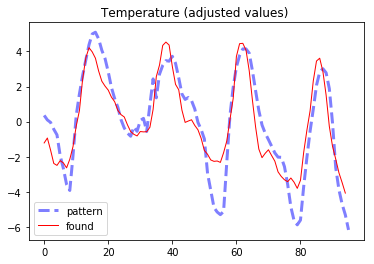

In [12]:
# we take out avg of temparature
# here we are intrested in dynamics not values 
ps_free_scale=PatternSearch(pattern[["Temperature"]],weather_data[["Temperature"]],n_min=90,n_max=102,n=15,noscale=True)
results_free_scale=ps_free_scale.FindPatterns(5,True)

score=0.0
found pattern is from 2010-03-01 00:00:00 to 2010-03-04 23:00:00
It is 0 steps different from pattern


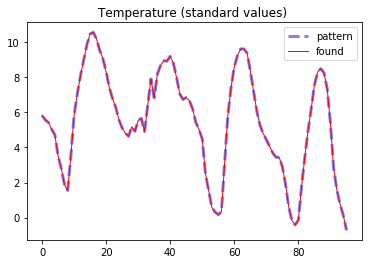

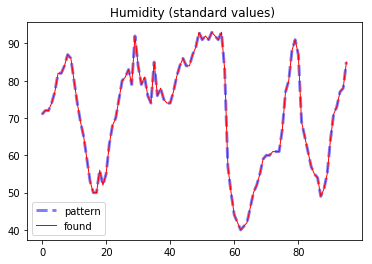

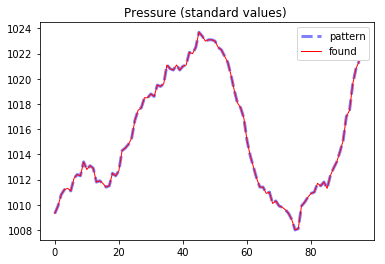

score=1.0592653942117525
found pattern is from 2010-10-16 23:00:00 to 2010-10-20 22:00:00
It is 0 steps different from pattern


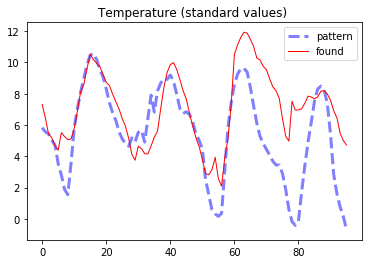

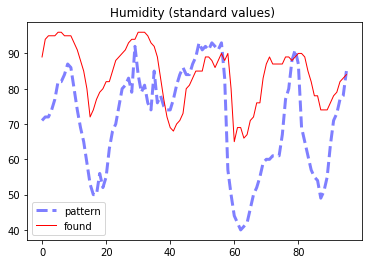

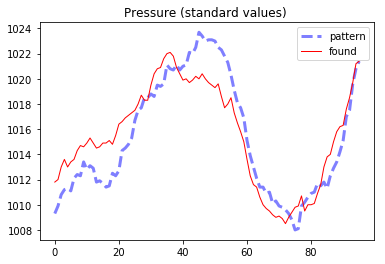

score=1.1062481896357965
found pattern is from 2016-03-20 00:00:00 to 2016-03-23 23:00:00
It is 0 steps different from pattern


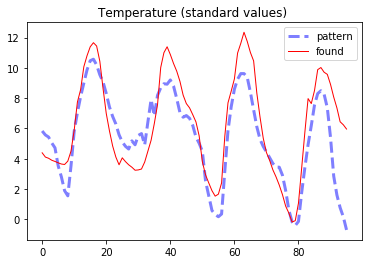

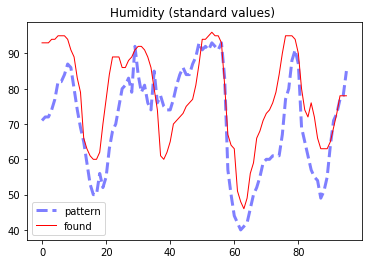

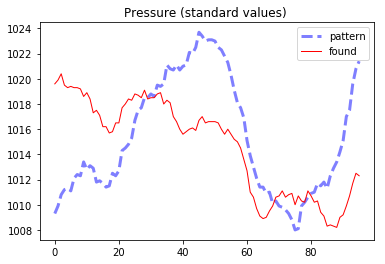

score=1.1075503723261628
found pattern is from 2013-01-10 02:00:00 to 2013-01-14 01:00:00
It is 0 steps different from pattern


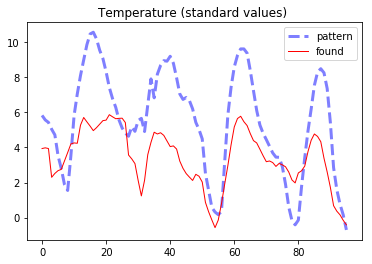

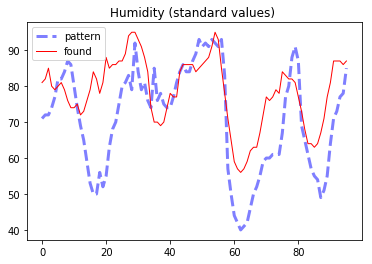

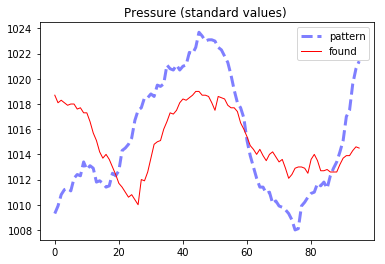

score=1.120631555266161
found pattern is from 2014-02-18 00:00:00 to 2014-02-21 23:00:00
It is 0 steps different from pattern


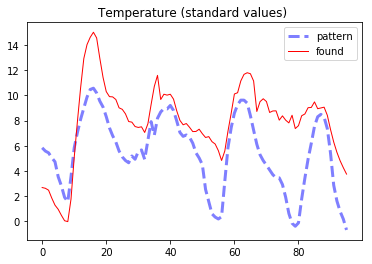

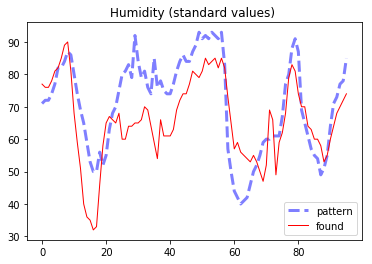

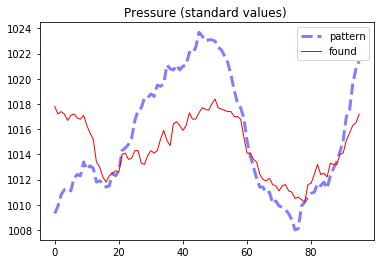

In [13]:
# we match 3 series 2 of those are scale free
ps_3series=PatternSearch(pattern,weather_data,n=15)
results_3series=ps_3series.FindPatterns(5,True)

score=0.0
found pattern is from 2010-03-01 00:00:00 to 2010-03-04 23:00:00
It is 0 steps different from pattern


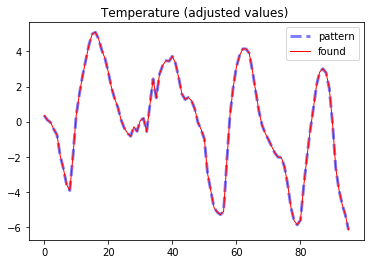

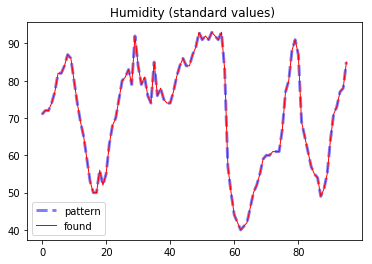

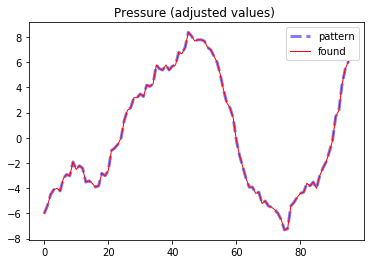

score=0.7923482133277808
found pattern is from 2016-10-08 00:00:00 to 2016-10-11 23:00:00
It is 0 steps different from pattern


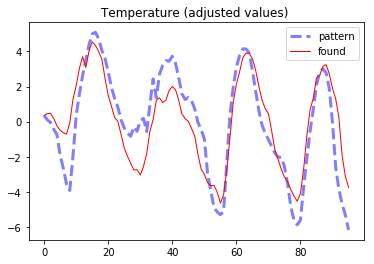

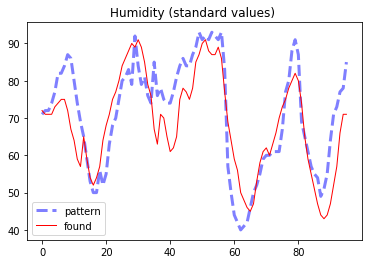

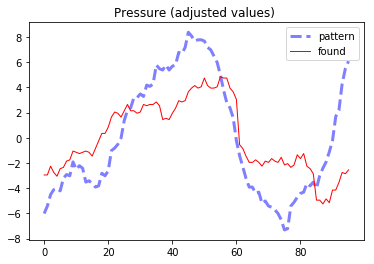

score=0.8817726322748446
found pattern is from 2012-04-04 01:00:00 to 2012-04-08 00:00:00
It is 0 steps different from pattern


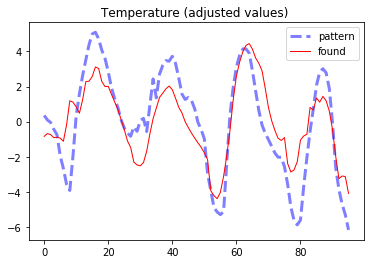

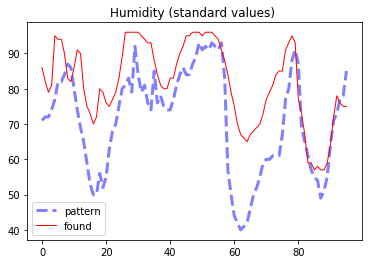

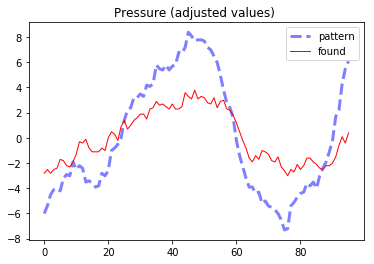

score=0.9231303522839552
found pattern is from 2015-12-08 01:00:00 to 2015-12-12 00:00:00
It is 0 steps different from pattern


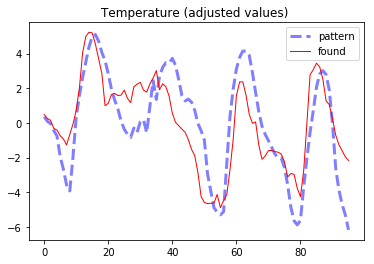

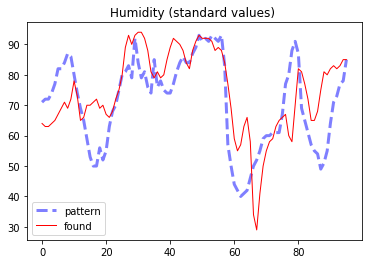

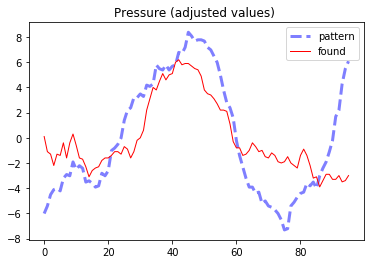

score=0.9243299371431526
found pattern is from 2014-10-25 00:00:00 to 2014-10-28 23:00:00
It is 0 steps different from pattern


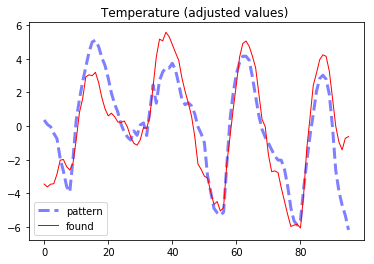

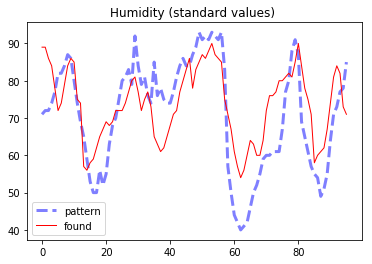

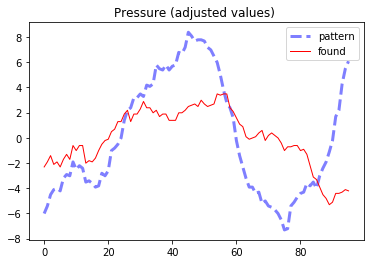

In [14]:
ps_3series_2scale_free=PatternSearch(pattern,weather_data,n=15,noscale={"Temperature":True,"Pressure":True})
results_3series_2scale_free=ps_3series_2scale_free.FindPatterns(5,True)